### Welcome to Project 1 Report by Shaopeng Guo, Tianhan Wei and Zhou He

In this project, two feature extraction approaches for the painting classification was adopted, namely transfer learning by pre-trained VGG 19 Model and extracting features by scattering net.

# Data Pre-processing
Since the images in painting dataset are limited and in high resolution, we determine to randomly crop 224 * 224 patch images which are saved and associated with their label. (e.g. A patch from forgery is labeled as fake)
As a result, we obtain 6084 patch images for training.

To preprocess the data, run 'python converter.py'

# VGG-19

In [3]:
import matplotlib.pyplot as plt
from scipy.misc import imread

The following diagram shows the architecture of VGG19 network. We use the FC6 layer, which is a 4096-dimensional vector for every image, and it contains rich information about the features of this image.

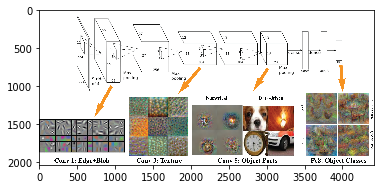

In [14]:
img = imread('./img/vgg.png')
plt.imshow(img)
plt.show()

Below are the PCA and t-SNE visualizations of the FC6 layer of all 6084 training patches.

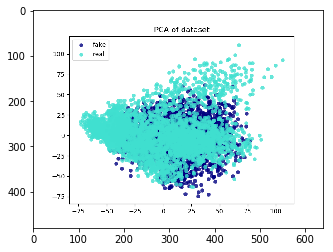

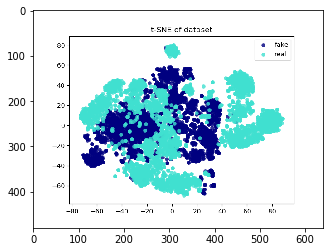

In [17]:
img = imread('./img/vgg_pca.png')
plt.imshow(img)
plt.show()
img = imread('./img/vgg_tsne.png')
plt.imshow(img)
plt.show()

The step-by-step walkthrough and documentation of extracting features by VGG19 and training an SVM model can be found in VGGfeatureextractor.ipynb. 

##### Prediction Result
We predict that the seven disputed paintings (numbered 1, 7, 10, 20, 23, 25, 26) are:
F, F, R, R, R, F, F, respectively.

# Scattering Net

Reference: https://github.com/edouardoyallon/pyscatwave (PyTorch implementation of scattering net)

Run 'python main.py' to extract features from scatter net and visualization on PCA and t-SNE dimension reduction. In the experiment, we use 4 levels of scatter net to extract feature from tensor of shape (1, 3, 224, 224) to (1, 3, 417, 14, 14). Since the output of scatter net is 417 channels of feature maps in size of 14*14, we need to flatten the feature maps to a vector of length 245196, resulting in that SVM needs to learn 245196 weights, which may take about hours for training.

Belows are the PCA and t-SNE visualization of the features extracted from scattering net 

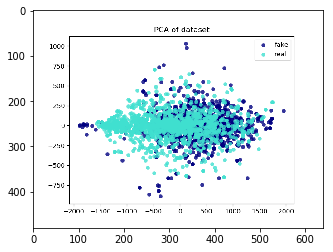

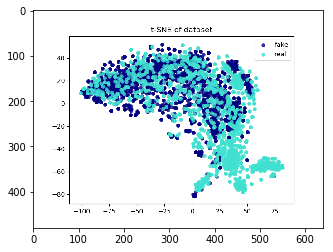

In [4]:
img = imread('scatter_pca1.png')
plt.imshow(img)
plt.show()
img = imread('scatter_tsne2.png')
plt.imshow(img)
plt.show()

##### Prediction Result
We predict that the seven disputed paintings (numbered 1, 7, 10, 20, 23, 25, 26) are: F, F, F, R, F, F, R, respectively.